# Building A Handwritten Digits Classifier

In this project, I will build models that classify handwritten digits. The load_digits() function returns a copy of the hand-written digits dataset from UCI. 

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
# Load the dataset
digits=load_digits()
digits_features=pd.DataFrame(digits['data'])
digits_labels=pd.Series(digits['target'])

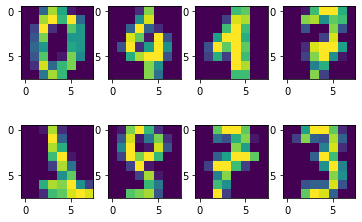

In [4]:

fig,ax=plt.subplots(2,4)
ax[0,0].imshow(digits_features.iloc[0].values.reshape(8,8))
ax[0,1].imshow(digits_features.iloc[100].values.reshape(8,8))
ax[0,2].imshow(digits_features.iloc[200].values.reshape(8,8))
ax[0,3].imshow(digits_features.iloc[300].values.reshape(8,8))
ax[1,0].imshow(digits_features.iloc[1000].values.reshape(8,8))
ax[1,1].imshow(digits_features.iloc[1100].values.reshape(8,8))
ax[1,2].imshow(digits_features.iloc[1200].values.reshape(8,8))
ax[1,3].imshow(digits_features.iloc[1300].values.reshape(8,8))


## K-Neighbors Algorithm

In [5]:
def train(k,train_features,train_labels):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features,train_labels)
    return knn

def test(knn,test_features,test_labels):
    predictions=knn.predict(test_features)
    accuracy=accuracy_score(test_labels,predictions)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2,shuffle=True)
    for train_index,test_index in kf.split(digits_features):
        train_features=digits_features.iloc[train_index]
        train_labels=digits_labels.iloc[train_index]
        test_features=digits_features.iloc[test_index]
        test_labels=digits_labels.iloc[test_index]
        knn=train(k,train_features,train_labels)
        accuracy=test(knn,test_features,test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)
cross_validate(1)

0.9888728037614452

Text(0.5, 1.0, 'Accuracy vs. k values')

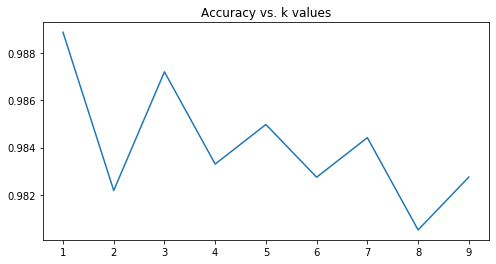

In [6]:
knn_accuracy_values=[cross_validate(x) for x in range(1,10)]
plt.figure(figsize=(8,4))
plt.plot(range(1,10),knn_accuracy_values)
plt.title("Accuracy vs. k values")

## Neural Network Models

In [23]:
def train_nn(neuron_arch,train_features,train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features,train_labels)
    return mlp

def test_nn(mlp,test_features,test_labels):
    predictions=mlp.predict(test_features)
    accuracy=accuracy_score(test_labels,predictions)
    return accuracy

def cross_validate_nn(neuron_arch):
    fold_accuracies=[]
    
    # 4-fold cross validation
    kf=KFold(n_splits=4,random_state=2,shuffle=True)
    for train_index,test_index in kf.split(digits_features):
        train_features=digits_features.loc[train_index]
        train_labels=digits_labels.loc[train_index]
        test_features=digits_features.loc[test_index]
        test_labels=digits_labels.loc[test_index]
        mlp=train_nn(neuron_arch,train_features,train_labels)
        accuracy=test_nn(mlp,test_features,test_labels)
        fold_accuracies.append(accuracy)
        
    return np.mean(fold_accuracies)


C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

Text(0.5, 1.0, 'Mean Accuracy vs. Neurons In Single Hidden Layer')

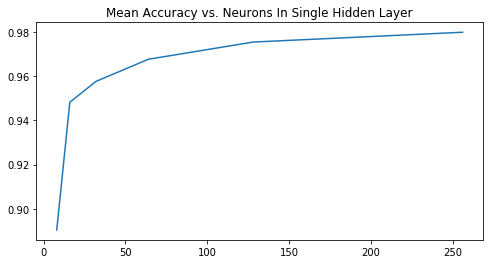

In [27]:
# Neural network with 1 hidden layer

nn_neurons=[(8,),(16,),(32,),(64,),(128,),(256,)]
nn_accuracy_values=[cross_validate_nn(x) for x in nn_neurons]
x=[i[0] for i in neurons_list]
plt.figure(figsize=(8,4))
plt.plot(x,nn_accuracy_values)
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

Text(0.5, 1.0, 'Mean Accuracy vs. Neurons In Two Hidden Layers')

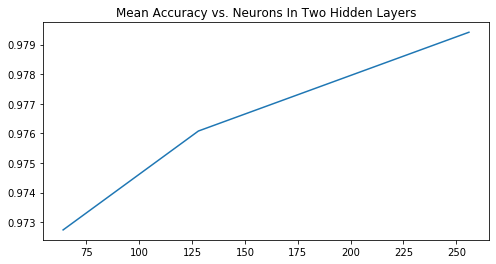

In [29]:
# Neural network with 2 hidden layers

two_neurons=[(64,64),(128,128),(256,256)]
two_accuracy_values=[cross_validate_nn(x) for x in two_neurons]
x=[i[0] for i in two_neurons]
plt.figure(figsize=(8,4))
plt.plot(x,two_accuracy_values)
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

In [30]:
def train_nn(neuron_arch,train_features,train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features,train_labels)
    return mlp

def test_nn(mlp,test_features,test_labels):
    predictions=mlp.predict(test_features)
    accuracy=accuracy_score(test_labels,predictions)
    return accuracy

def cross_validate_nn_six(neuron_arch):
    fold_accuracies=[]
    
    # 6-fold cross validation
    kf=KFold(n_splits=6,random_state=2,shuffle=True)
    for train_index,test_index in kf.split(digits_features):
        train_features=digits_features.iloc[train_index]
        train_labels=digits_labels.iloc[train_index]
        test_features=digits_features.iloc[test_index]
        test_labels=digits_labels.iloc[test_index]
        mlp=train_nn(neuron_arch,train_features,train_labels)
        accuracy=test_nn(mlp,test_features,test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Duc Cao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

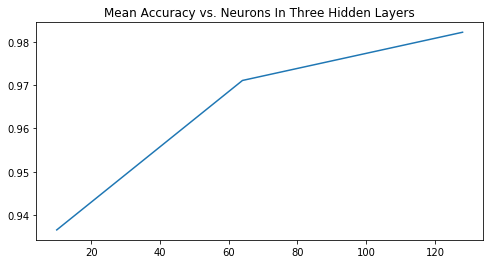

In [31]:
# Neural network with 3 hidden layers

three_neurons = [(10, 10, 10),(64, 64, 64),(128, 128, 128)]

three_accuracy_values=[cross_validate_nn_six(x) for x in three_neurons]

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")
x = [i[0] for i in three_neurons]
plt.plot(x, three_accuracy_values)

In [32]:
three_accuracy_values

[0.9365793385358603, 0.9710758082497213, 0.9822054998141955]

## Summary

Using 3 hidden layers improved the simple accuracy to 98% even with 6-fold cross validation. Having more layers and more neurons tends to improve the network's performance.